# Classificador facial de olhos abertos ou fechados
## Projeto VIII - Visão Computacional e Aprendizado de Máquina 
Autor: Luís Gabriel Pereira Condados

In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import myUtils

Download do shape_predictor: http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [2]:
# detector de faces
detector  = dlib.get_frontal_face_detector()
# identificador dos landmarks
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")

## Carregando o dataset

In [3]:
df_train = pd.read_csv("dataset/train_set.csv", index_col=0)
df_test  = pd.read_csv("dataset/test_set.csv", index_col=0)

In [4]:
X_ear_train = df_train.iloc[:,1:3].to_numpy()
X_ear_test = df_test.iloc[:,1:3].to_numpy()

X_ear_hist_train = df_train.iloc[:,1:11].to_numpy()
X_ear_hist_test = df_test.iloc[:,1:11].to_numpy()

y_train = df_train.iloc[:,-1].to_numpy()
y_test = df_test.iloc[:,-1].to_numpy()

## Criando o modelo, o classificador

#### Função simples para classificar com base apenas no EAR

In [5]:
# X vetor de features: EAR_LEFT, EAR_RIGHT
def my_simple_classifier(X, thr=0.2):
    y_pred = [(np.average(xi) >= thr) for xi in X]
    return np.array(y_pred,dtype='int')

In [6]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

**Decision Tree**

In [7]:
# Decision Tree
tree_model= tree.DecisionTreeClassifier()

**RandomForest Classifier**

In [8]:
# Random Forest
rforest_model = RandomForestClassifier(n_estimators=10, max_depth=None)

**SVM**

In [9]:
# SVM
# svm_model = svm.SVC(C=1.0,kernel='linear')
svm_model = svm.SVC(C=2.0)

**MLP**

In [10]:
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32,), 
                          activation='relu', 
                          solver='adam', 
                          batch_size=30, 
                          early_stopping=True,
                          max_iter=100,
                          verbose=False)

## Treinamento

### Usando apenas EAR

In [11]:
tree_model.fit(X_ear_train, y_train)

DecisionTreeClassifier()

In [12]:
rforest_model.fit(X_ear_train, y_train)

RandomForestClassifier(n_estimators=10)

In [13]:
svm_model.fit(X_ear_train, y_train)

SVC(C=2.0)

In [14]:
mlp_model.fit(X_ear_train, y_train)
print("Best Valid Score = ", mlp_model.best_validation_score_)

Best Valid Score =  0.8505154639175257


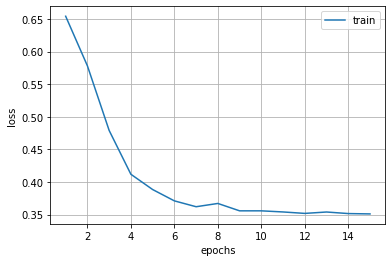

In [15]:
epochs = range(1,len(mlp_model.loss_curve_)+1)

plt.plot(epochs, mlp_model.loss_curve_, label='train')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

## Validação

In [16]:
def validation(y_true, y_pred):
    cm = myUtils.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    metrics = myUtils.compute_metrics_from_cm(cm)
    print("Accuracy = {:.2f}%".format(metrics['accuracy']*100))

**Simple Classifier**

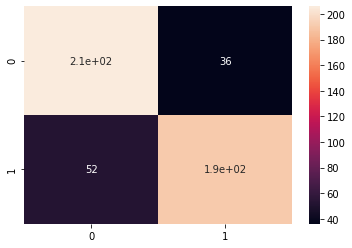

Accuracy = 81.86%


In [17]:
y_pred = my_simple_classifier(X_ear_test, thr=0.25)

validation(y_test, y_pred)

**Decision Tree**

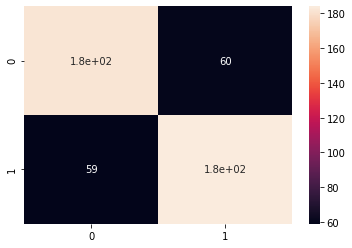

Accuracy = 75.46%


In [18]:
y_pred = tree_model.predict(X_ear_test)

validation(y_test, y_pred)

**Random Forest**

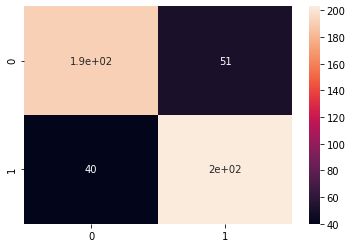

Accuracy = 81.24%


In [19]:
y_pred = rforest_model.predict(X_ear_test)

validation(y_test, y_pred)

**SVM**

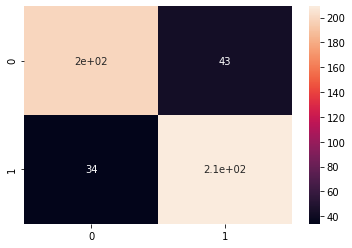

Accuracy = 84.12%


In [20]:
y_pred = svm_model.predict(X_ear_test)

validation(y_test, y_pred)

**MLP**

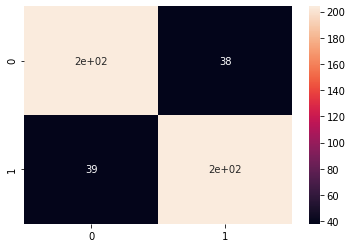

Accuracy = 84.12%


In [21]:
y_pred = mlp_model.predict(X_ear_test)

validation(y_test, y_pred)

### Usando EAR + HIST

In [22]:
tree_model.fit(X_ear_hist_train, y_train)

DecisionTreeClassifier()

In [23]:
rforest_model.fit(X_ear_hist_train, y_train)

RandomForestClassifier(n_estimators=10)

In [24]:
svm_model.fit(X_ear_hist_train, y_train)

SVC(C=2.0)

In [25]:
mlp_model.fit(X_ear_hist_train, y_train)
print("Best Valid Score = ", mlp_model.best_validation_score_)

Best Valid Score =  0.8969072164948454


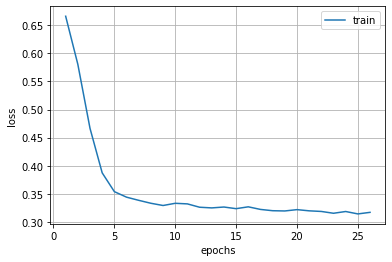

In [26]:
epochs = range(1,len(mlp_model.loss_curve_)+1)

plt.plot(epochs, mlp_model.loss_curve_, label='train')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

## Validação

**Decision Tree**

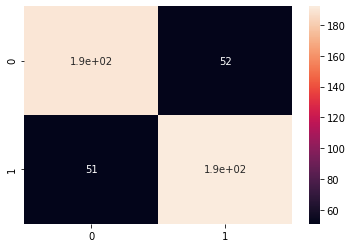

Accuracy = 78.76%


In [27]:
y_pred = tree_model.predict(X_ear_hist_test)

validation(y_test, y_pred)

**Random Forest**

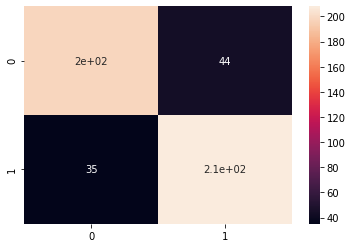

Accuracy = 83.71%


In [28]:
y_pred = rforest_model.predict(X_ear_hist_test)

validation(y_test, y_pred)

**SVM**

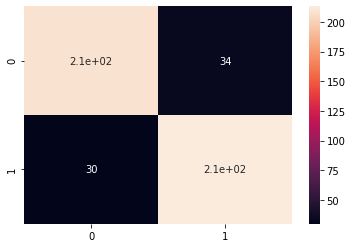

Accuracy = 86.80%


In [29]:
y_pred = svm_model.predict(X_ear_hist_test)

validation(y_test, y_pred)

**MLP**

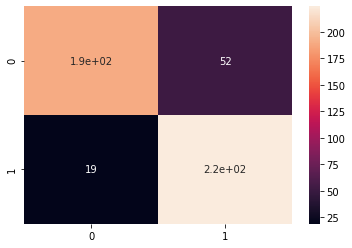

Accuracy = 85.36%


In [30]:
y_pred = mlp_model.predict(X_ear_hist_test)

validation(y_test, y_pred)